#**How to Train YOLO11 Object Detection Model on a Custom Dataset**

In [1]:
!nvidia-smi

Thu Aug 21 11:21:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [2]:
!pip install ultralytics

**Step 02 # Import All the Requried Libraries**

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.0/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

In [5]:

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YeQykhh1hFbcXJMCqc88")
project = rf.workspace("wassim-kzi07").project("wassimoss-oqgdg")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [6]:
dataset.location

'/content/wassimoss-2'

In [7]:
!yolo task=detect mode=train data=/content/wassimoss-2/data.yaml model="yolo11s.pt" epochs=100 imgsz=640

Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/wassimoss-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

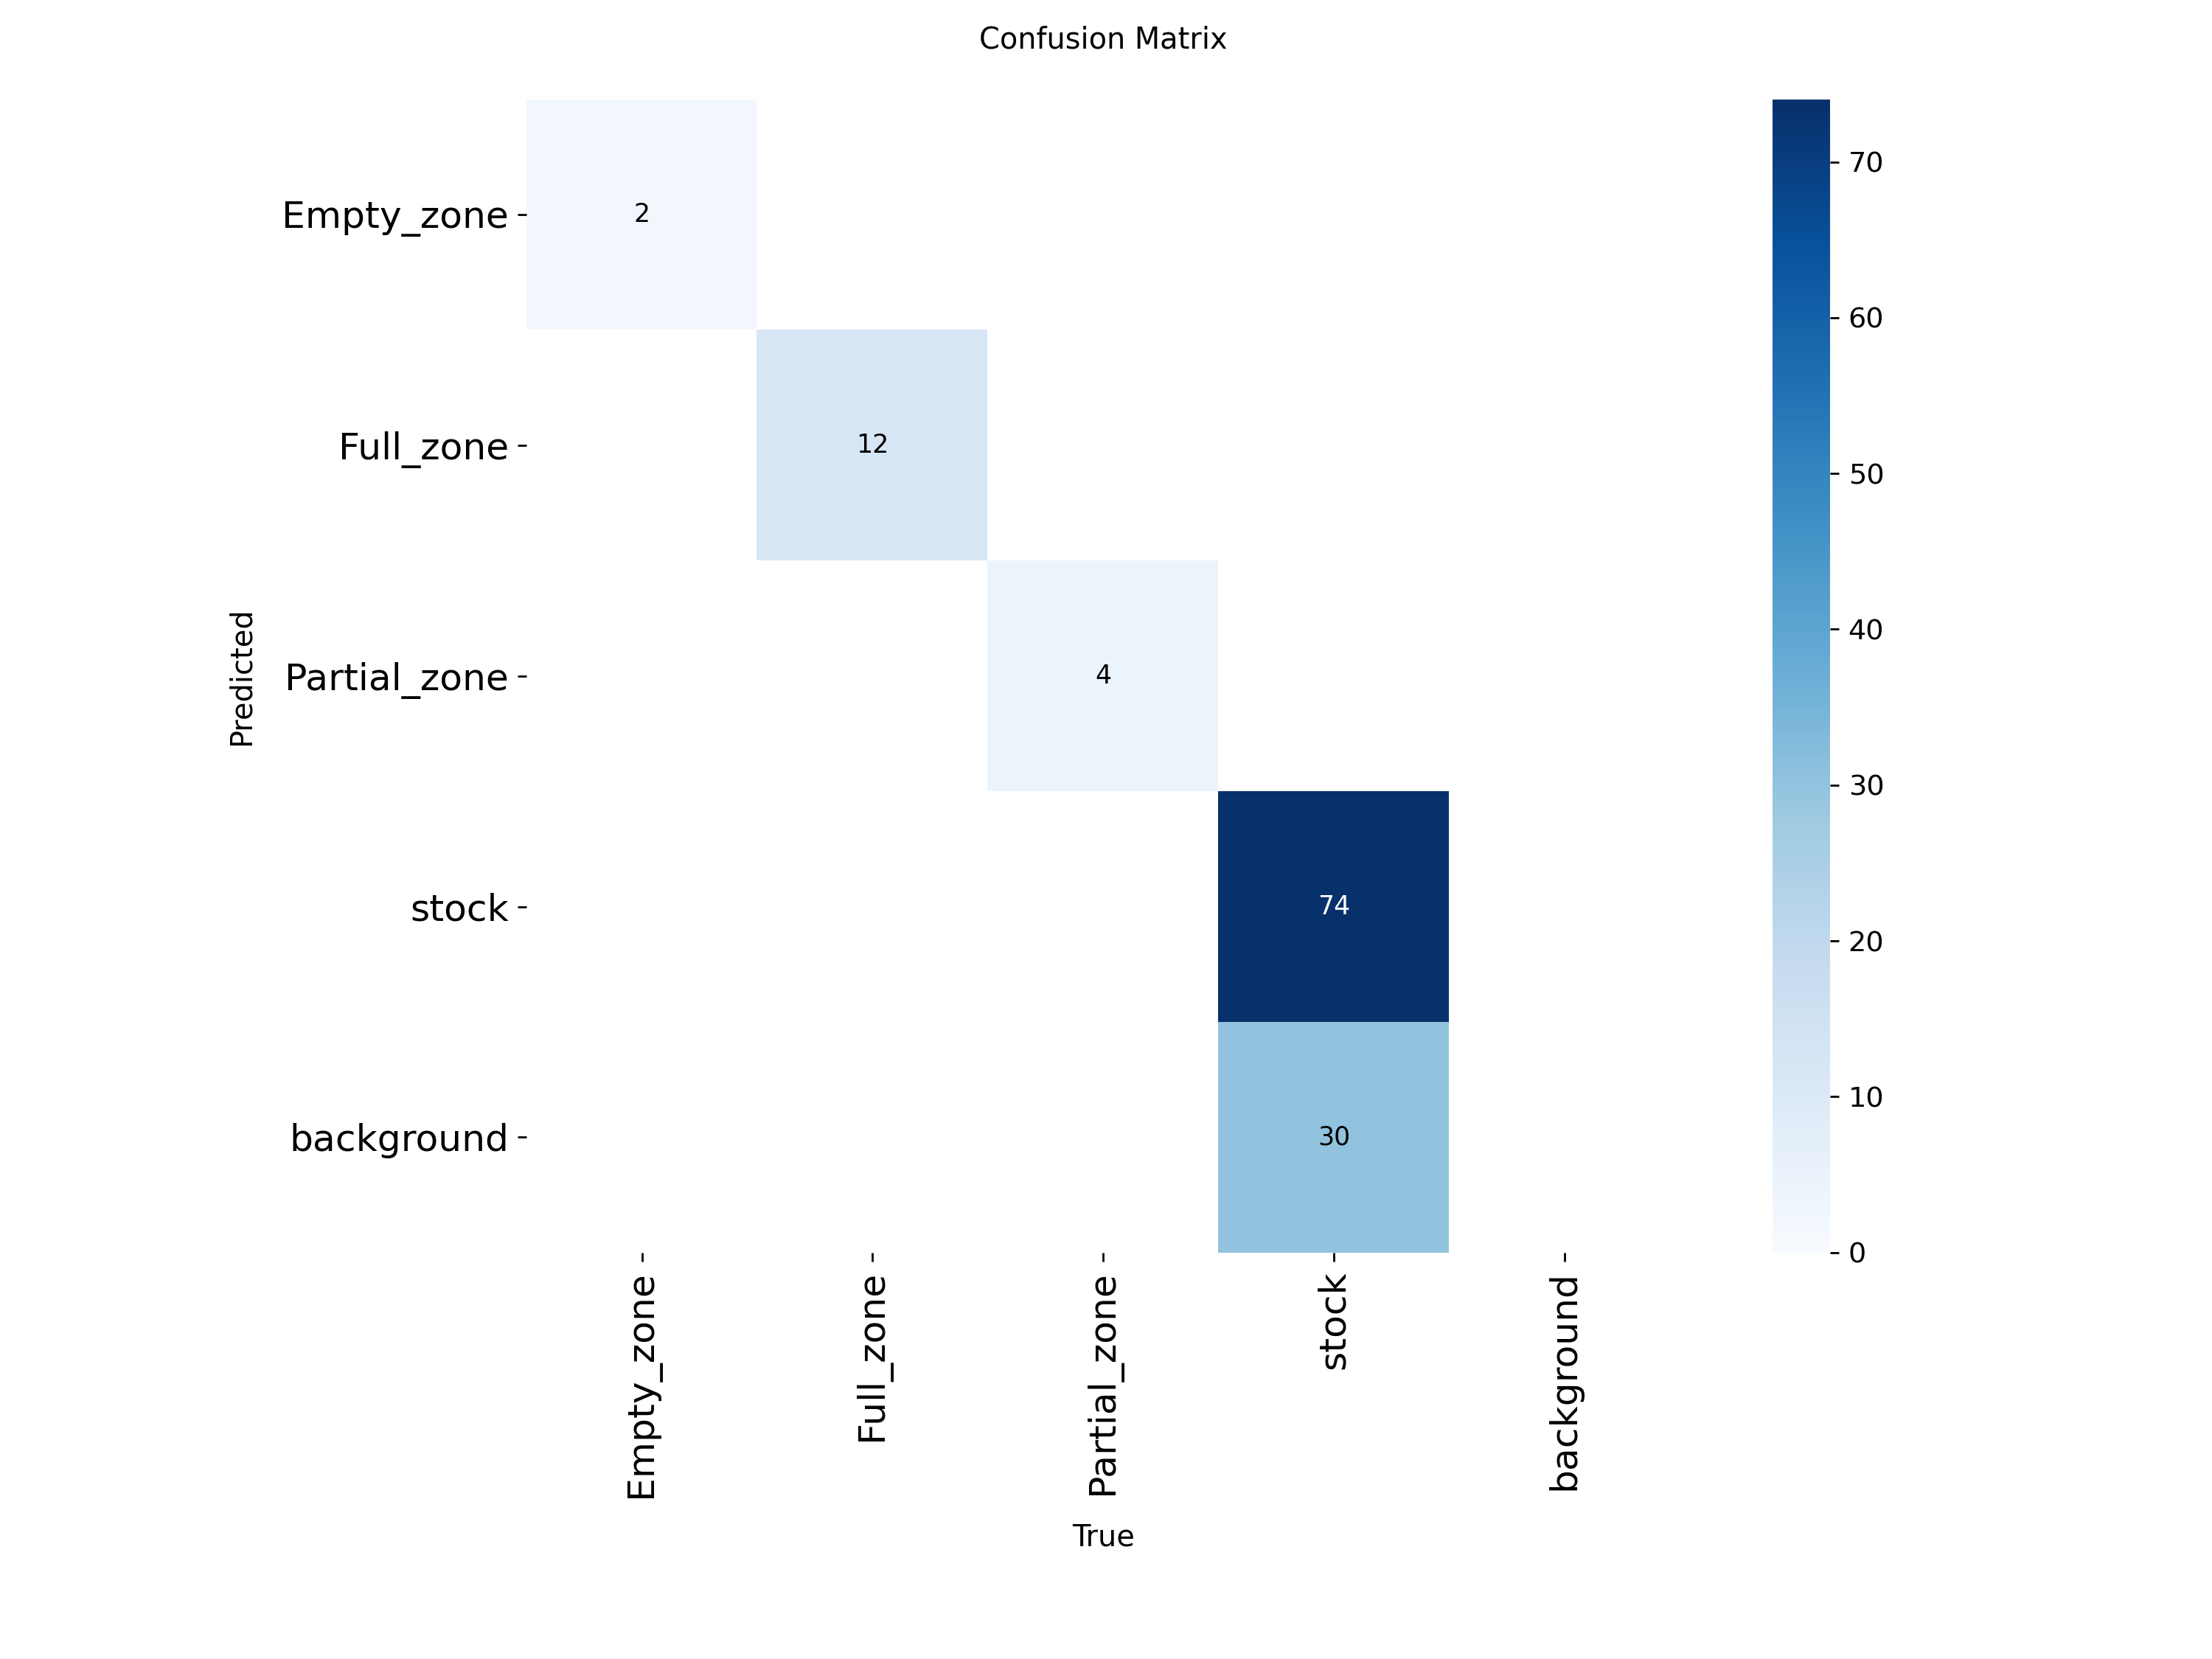

In [8]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

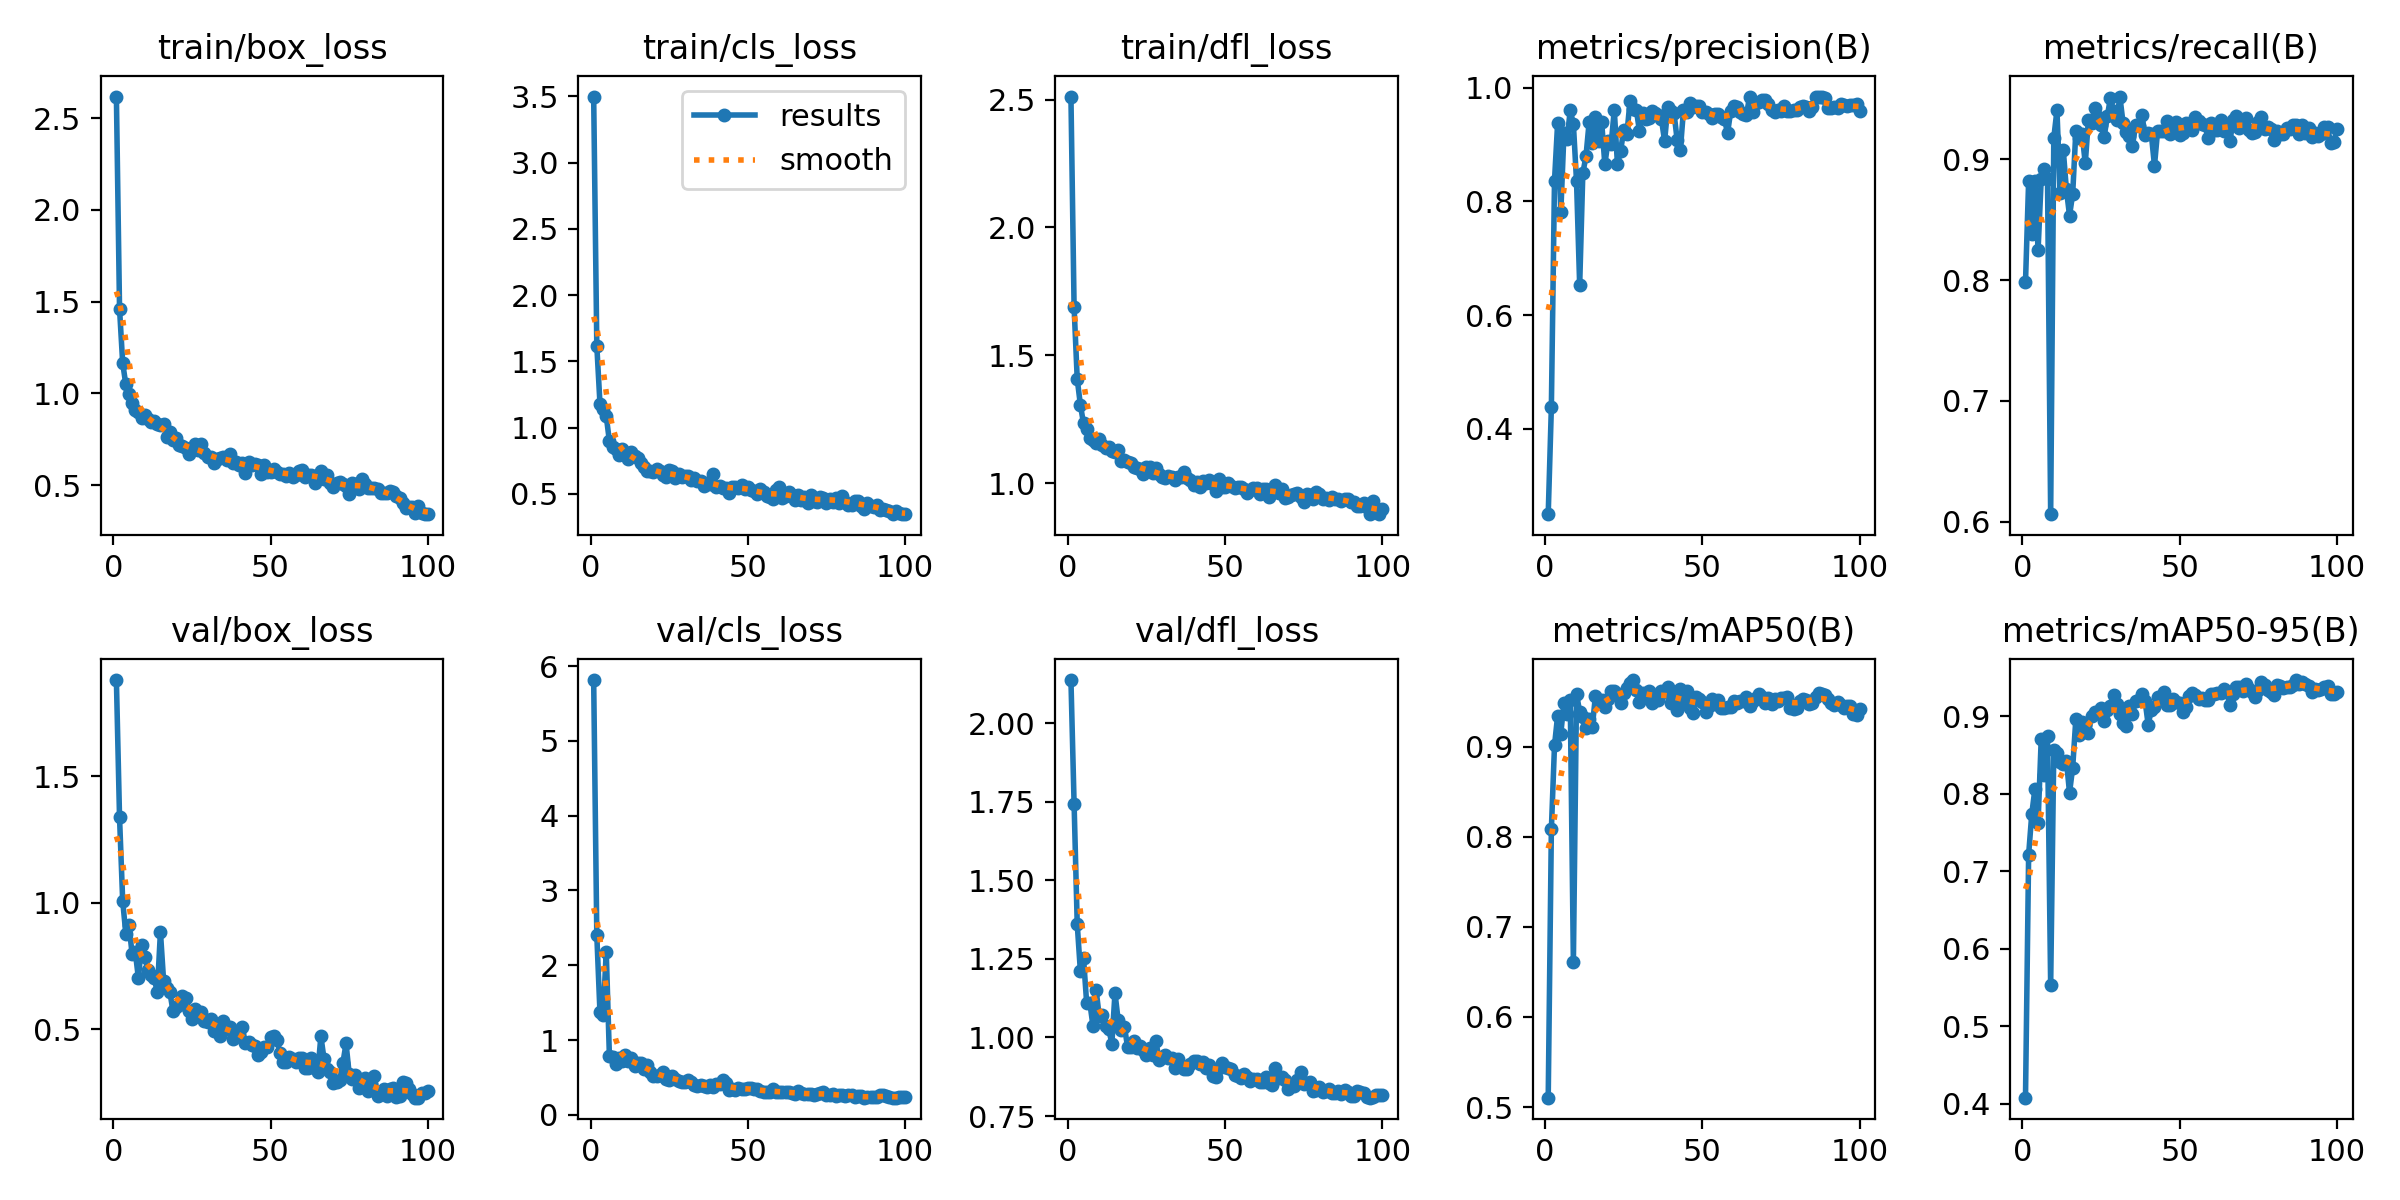

In [9]:
Image("/content/runs/detect/train/results.png", width=600)

In [10]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1316.8±411.3 MB/s, size: 29.3 KB)
val: Scanning /content/wassimoss-2/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  3.47it/s]
                   all          6        122      0.983      0.928      0.959      0.947
            Empty_zone          2          2          1          1      0.995      0.995
             Full_zone          6         12      0.982          1      0.995      0.995
          Partial_zone          4          4      0.951          1      0.995      0.995
                 stock          4        104          1      0.712      0.852      0.802
Speed: 0.2ms preprocess, 14.3ms inference, 0.0ms loss, 16.3ms

In [11]:
!yolo task=detect mode=predict model= /content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.182 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs

image 1/5 /content/wassimoss-2/test/images/ezgif-frame-091_jpg.rf.c66e33f893bd9e2541517a13d391ae1f.jpg: 384x640 2 Full_zones, 1 Partial_zone, 17 stocks, 77.0ms
image 2/5 /content/wassimoss-2/test/images/ezgif-frame-099_jpg.rf.d8656032f95a80d9e91c4da44d8b634b.jpg: 384x640 3 Full_zones, 1 Partial_zone, 17 stocks, 10.9ms
image 3/5 /content/wassimoss-2/test/images/ezgif-frame-107_jpg.rf.1ffe38545d4d04a412fb2dd35c24f67f.jpg: 384x640 1 Empty_zone, 2 Full_zones, 10.8ms
image 4/5 /content/wassimoss-2/test/images/ezgif-frame-112_jpg.rf.d4bcc21501ed3c7b040ca1c0ba60e704.jpg: 384x640 1 Empty_zone, 2 Full_zones, 10.8ms
image 5/5 /content/wassimoss-2/test/images/ezgif-frame-115_jpg.rf.a1eb095254f83ca202e589fa84599cdc.jpg: 384x640 1 Empty_zone, 2 Full_zones, 10.8ms
Speed: 3.4ms preprocess, 24.0ms inference, 19.8ms postprocess per image

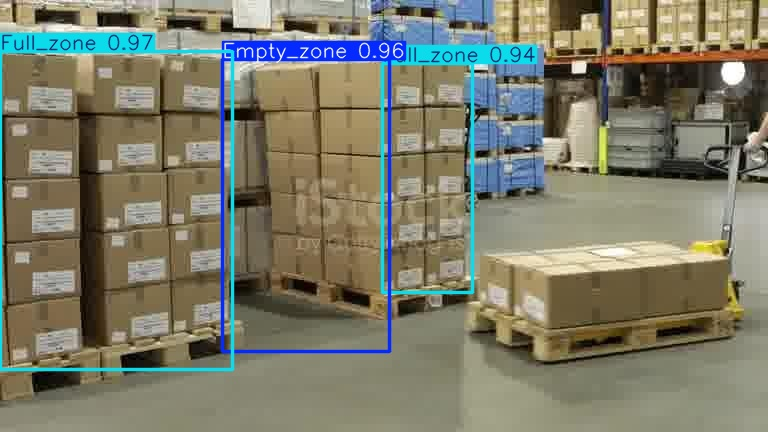

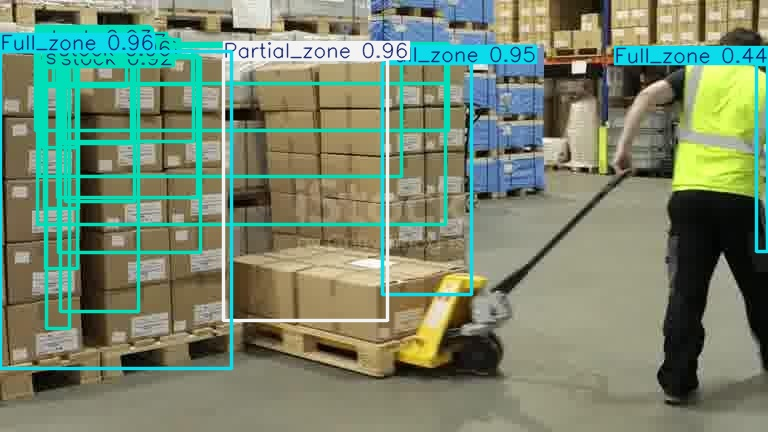

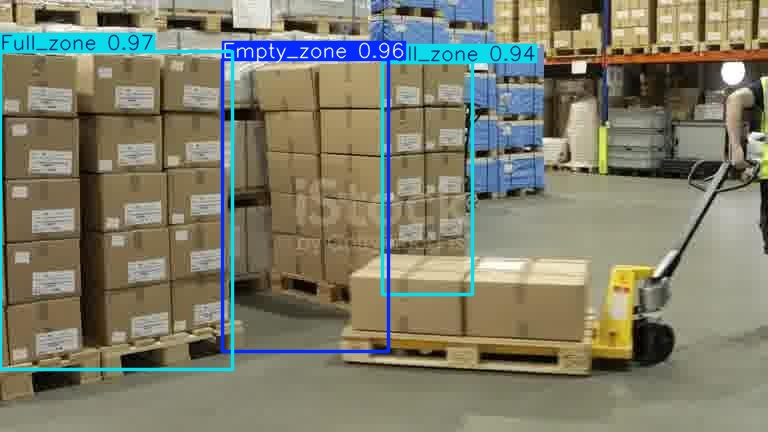

In [12]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [13]:
from google.colab import files

# You can download the best performing model weights using the following code:
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>